# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Automatic segmentation](#Automatic-segmentation)
- [Segmentation maintenance analysis](#Segmentation-maintenance-analysis)

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [393]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_data_automatic_segmentation.pkl")

rfm_new_df_for_automatic_segmentation = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

df_subset_for_purchase_dates = pd.read_pickle("./pickle_dataset_time_analysis.pkl")

## Automatic segmentation

We will perform the customers segmentation by using unsupervised Machine Learning algorithms. For this we will create a new data frame that will contain the variables that we will potentially use for this.

In [329]:
automatic_segmentation_df = new_df_for_segmentation_analysis.copy()

In [330]:
automatic_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 115298
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    91231 non-null  object 
 1   review_score_for_a_customer_order     91231 non-null  float64
 2   number_of_items_for_a_customer        91231 non-null  float64
 3   number_of_orders_for_a_customer       91231 non-null  float64
 4   payment_value_for_a_customer_order    91231 non-null  float64
 5   appliances_products_per_customer      91231 non-null  float64
 6   arts_products_per_customer            91231 non-null  float64
 7   auto_products_per_customer            91231 non-null  float64
 8   construction_products_per_customer    91231 non-null  float64
 9   electronics_products_per_customer     91231 non-null  float64
 10  fashion_products_per_customer         91231 non-null  float64
 11  food_drinks_pr

We will eliminate information containing some identifiers such as the product and order. We will eliminate the customer_zip_code_prefix, the customer city and state. 

We will also eliminate the variables median_number_of_orders_for_a_customer and median_payment_value because we will merge the present dataframe with the one created for the RFM analysis and we will keep the Recency, Frequency and Monetary_value features.

In [331]:
automatic_segmentation_df.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'number_of_orders_for_a_customer',
       'payment_value_for_a_customer_order',
       'appliances_products_per_customer', 'arts_products_per_customer',
       'auto_products_per_customer', 'construction_products_per_customer',
       'electronics_products_per_customer', 'fashion_products_per_customer',
       'food_drinks_products_per_customer',
       'garden_pets_products_per_customer',
       'health_beauty_products_per_customer', 'home_products_per_customer',
       'office_products_per_customer', 'other_products_per_customer',
       'sports_leisure_products_per_customer', 'order_id', 'payment_type',
       'zip_code_prefix', 'customer_geolocation_latitude',
       'customer_geolocation_longitude', 'customer_city', 'customer_state',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'product_category_name_english', 'delay_days_purchase_delivery',
    

In [332]:
automatic_segmentation_df = automatic_segmentation_df.drop(columns=['number_of_orders_for_a_customer',
                                                                    'payment_value_for_a_customer_order',
                                                                    'order_id',
                                                                    'payment_type', 
                                                                    'zip_code_prefix', 
                                                                    'customer_geolocation_latitude',
                                                                    'customer_geolocation_longitude', 
                                                                    'customer_city', 
                                                                    'customer_state',
                                                                    'order_purchase_timestamp', 
                                                                    'order_delivered_customer_date',
                                                                    'product_category_name_english'])

In [333]:
automatic_segmentation_new_df = automatic_segmentation_df.copy()

In [334]:
automatic_segmentation_new_df = pd.merge(automatic_segmentation_df, rfm_new_df_for_automatic_segmentation, on='customer_unique_id')

In [335]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    91231 non-null  object 
 1   review_score_for_a_customer_order     91231 non-null  float64
 2   number_of_items_for_a_customer        91231 non-null  float64
 3   appliances_products_per_customer      91231 non-null  float64
 4   arts_products_per_customer            91231 non-null  float64
 5   auto_products_per_customer            91231 non-null  float64
 6   construction_products_per_customer    91231 non-null  float64
 7   electronics_products_per_customer     91231 non-null  float64
 8   fashion_products_per_customer         91231 non-null  float64
 9   food_drinks_products_per_customer     91231 non-null  float64
 10  garden_pets_products_per_customer     91231 non-null  float64
 11  health_beauty_p

At the end we have decided not to keep the variables corresponding to the median of each product category per customer. Although initially one of the goals was to perform a segmentation using these variables, we have finally decided to drop them. Finally we will produce a new dataframe that contains the variables to use for the clusterization.

In [336]:
automatic_segmentation_new_df = automatic_segmentation_new_df.drop(columns=['appliances_products_per_customer', 
                                                                             'arts_products_per_customer',
                                                                             'auto_products_per_customer', 
                                                                             'construction_products_per_customer',
                                                                             'electronics_products_per_customer', 
                                                                             'fashion_products_per_customer',
                                                                             'food_drinks_products_per_customer',
                                                                             'garden_pets_products_per_customer',
                                                                             'health_beauty_products_per_customer', 
                                                                             'home_products_per_customer',
                                                                             'office_products_per_customer', 
                                                                             'other_products_per_customer',
                                                                             'sports_leisure_products_per_customer'])

### Feature correlation analysis

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/).

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

* Correlation Coefficient = +1: A perfect positive relationship. 

* Correlation Coefficient >= 0.8: A fairly strong positive relationship.

* Correlation Coefficient <= -0.8: A fairly strong negative relationship.

The idea is to eliminate those variables that have more than 0.75 correlation.

In [769]:
automatic_segmentation_new_df.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score'],
      dtype='object')

In [770]:
columns_for_correlation_matriz = ['review_score_for_a_customer_order',
                                    'number_of_items_for_a_customer', 
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance', 
                                    'Frequency',
                                    'Monetary_value', 
                                    'Recency']

In [771]:
df_for_correlation_matrix = automatic_segmentation_new_df.copy()

In [772]:
df_for_correlation_matrix = df_for_correlation_matrix[columns_for_correlation_matriz]
df_for_correlation_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 91230
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   review_score_for_a_customer_order  91231 non-null  float64
 1   number_of_items_for_a_customer     91231 non-null  float64
 2   delay_days_purchase_delivery       91231 non-null  int64  
 3   olist_office_customer_distance     91231 non-null  float64
 4   Frequency                          91231 non-null  float64
 5   Monetary_value                     91231 non-null  float64
 6   Recency                            91231 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 7.6 MB


In [777]:
correlation_matrix = df_for_correlation_matrix.corr(method='kendall')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

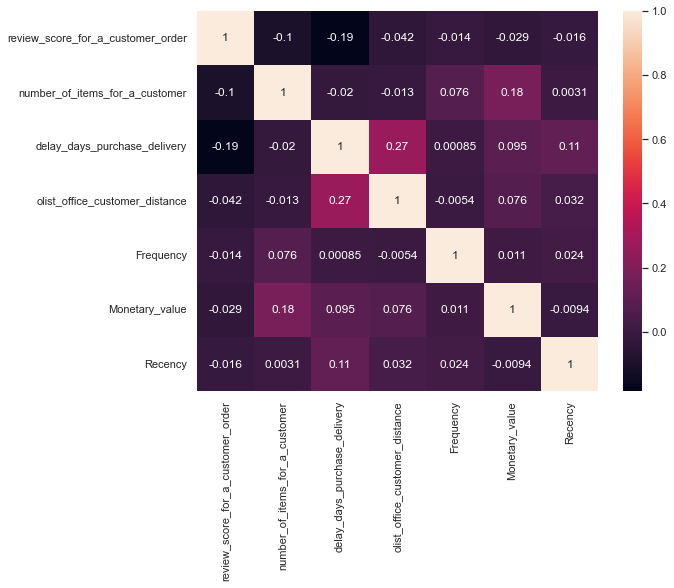

In [778]:
plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

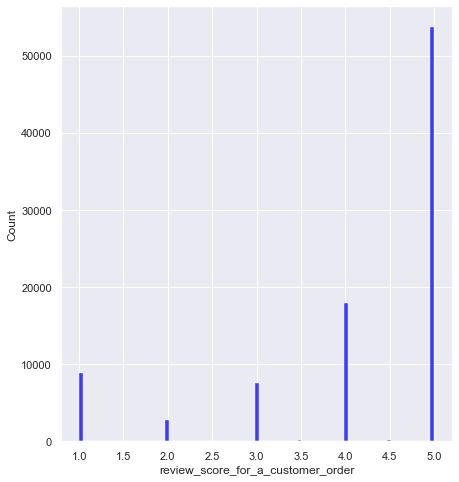

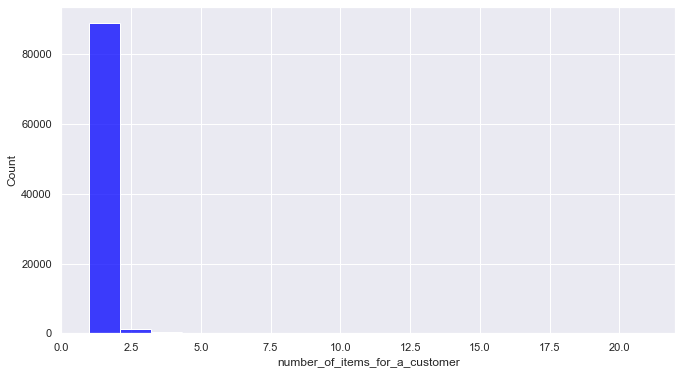

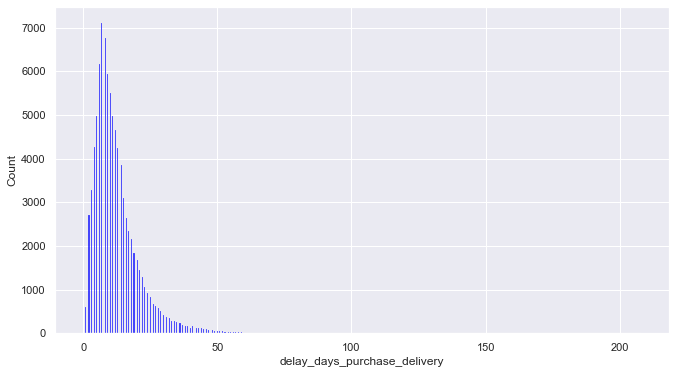

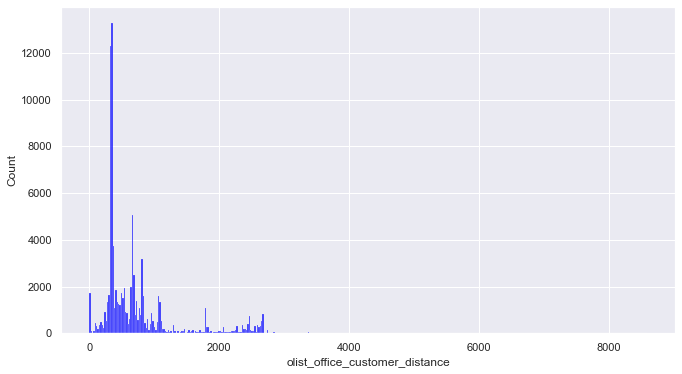

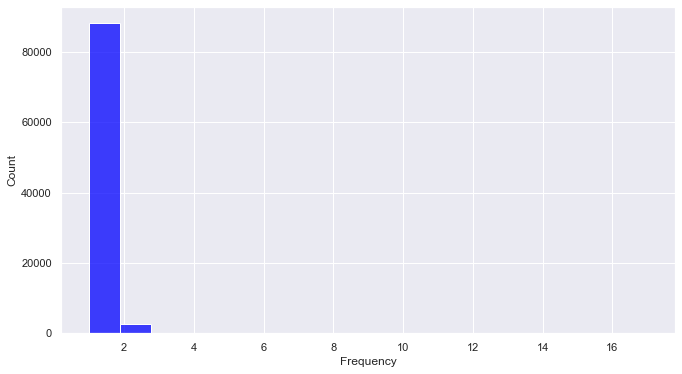

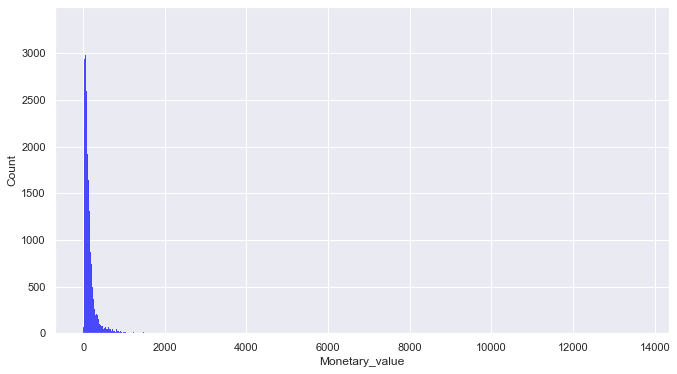

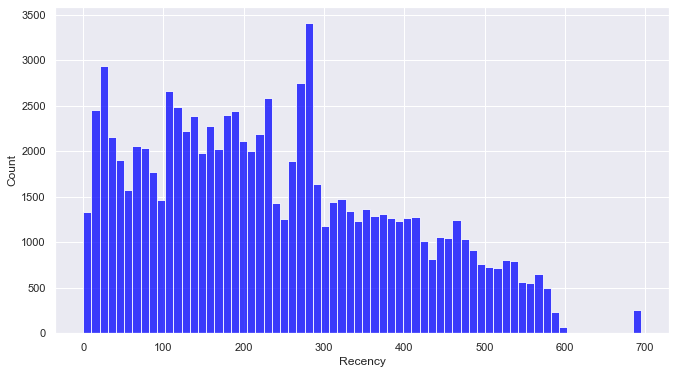

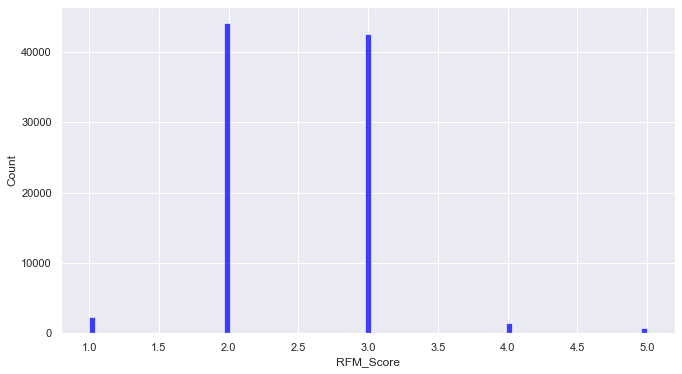

In [337]:
plt.subplots(figsize=(7, 8))

columns_histogram = automatic_segmentation_new_df.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
# columns_histogram.remove('RFM_Score')

for i in columns_histogram:
    sns.histplot(data = automatic_segmentation_new_df, x=i, color="blue")
    plt.show()

In [338]:
df_log_transformed = automatic_segmentation_new_df.copy()

In [339]:
columns_for_log_transformation = ['review_score_for_a_customer_order',
                                    'number_of_items_for_a_customer',
                                    'Frequency',
                                    'Monetary_value',
                                    'Recency',
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance']

In [340]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [341]:
# columns_histogram = df_log_transformed.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_log_transformed, x=i, color="blue")
#     plt.show()

In [342]:
df_log_transformed.describe()

review_score_for_a_customer_order  number_of_items_for_a_customer  \
count                       91231.000000                    91231.000000   
mean                            0.594196                        0.075748   
std                             0.200911                        0.109224   
min                             0.041393                        0.041393   
25%                             0.612784                        0.041393   
50%                             0.707570                        0.041393   
75%                             0.707570                        0.041393   
max                             0.707570                        1.324282   

       delay_days_purchase_delivery  olist_office_customer_distance  \
count                  91231.000000                    91231.000000   
mean                       1.001773                        2.719506   
std                        0.296052                        0.396090   
min                       -1.000000                       -0.118249   
25%                        0.851258                        2.532751   
50%                        1.004321                        2.695412   
75%                        1.206826                        2.912959   
max                        2.318272                        3.934224   

          Frequency  Monetary_value       Recency     RFM_Score  
count  91231.000000    91231.000000  91231.000000  91231.000000  
mean       0.051051        2.028748      2.237942      2.500170  
std        0.054018        0.357493      0.416413      0.621298  
min        0.041393       -1.000000     -1.000000      1.000000  
25%        0.041393        1.786041      2.057286      2.000000  
50%        0.041393        2.013259      2.340642      2.000000  
75%        0.041393        2.243286      2.540455      3.000000  
max        1.232996        4.135581      2.842047      5.000000

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [343]:
df_for_z_scores = df_log_transformed.copy()

In [344]:
columns_for_z_scores = df_for_z_scores.columns.tolist()
columns_for_z_scores.remove('Segment_name')
columns_for_z_scores.remove('customer_unique_id')
columns_for_z_scores.remove('RFM_Score')

for col in df_for_z_scores.columns:
    if col in columns_for_z_scores:
        # standardize data
        df_for_z_scores[col] = (df_for_z_scores[col] - df_for_z_scores[col].mean()) / df_for_z_scores[col].std()

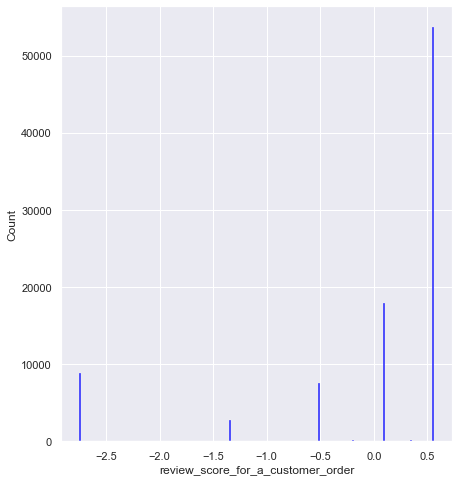

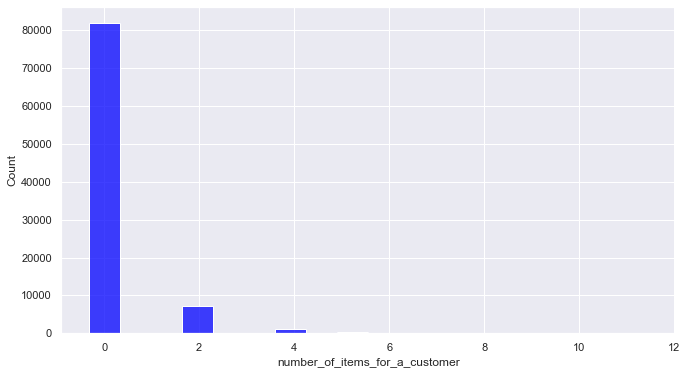

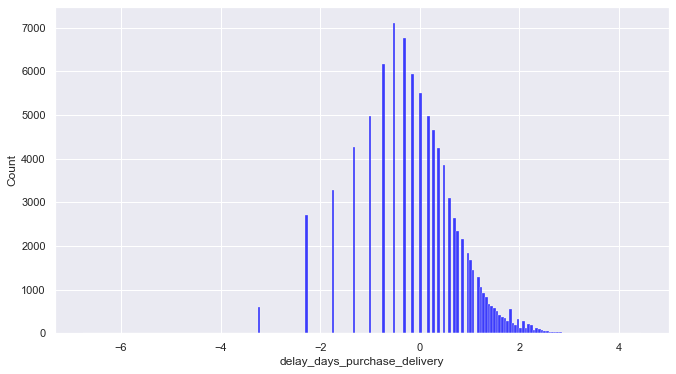

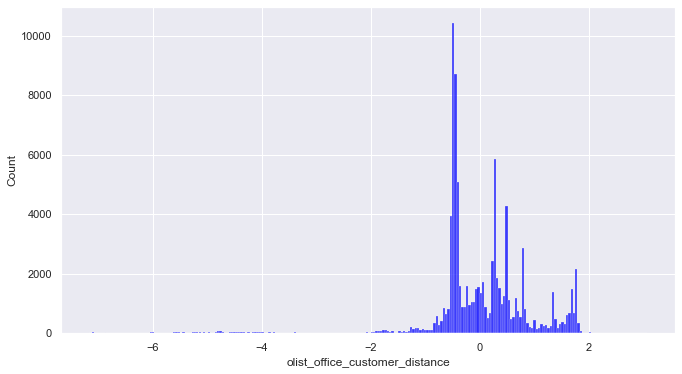

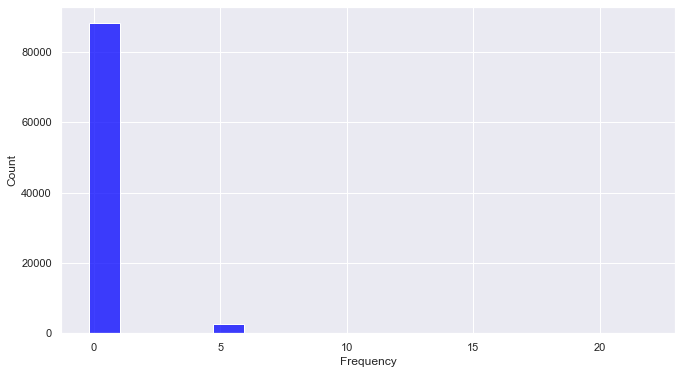

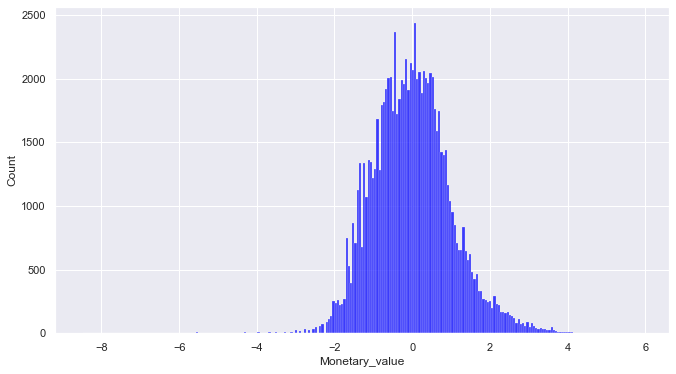

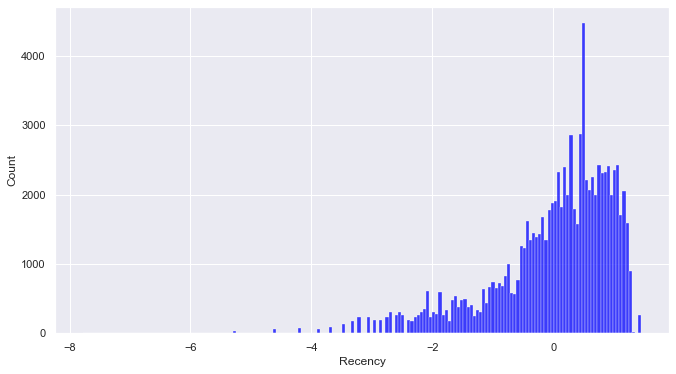

In [345]:
columns_histogram = df_for_z_scores.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
columns_histogram.remove('RFM_Score')

plt.subplots(figsize=(7, 8))
for i in columns_histogram:
    sns.histplot(data=df_for_z_scores, x=i, color="blue")
    plt.show()

In [346]:
df_standardized = df_for_z_scores.copy()

In [347]:
df_standardized_without_outliers = df_standardized.loc[(df_standardized['number_of_items_for_a_customer'] >= -4) & (df_standardized['number_of_items_for_a_customer'] <= 4)
                                                        & (df_standardized['Frequency'] >= -4) & (df_standardized['Frequency'] <= 4)
                                                        & (df_standardized['Monetary_value'] >= -4) & (df_standardized['Monetary_value'] <= 4)
                                                        & (df_standardized['Recency'] >= -4) & (df_standardized['Recency'] <= 4)
                                                        & (df_standardized['delay_days_purchase_delivery'] >= -4) & (df_standardized['delay_days_purchase_delivery'] <= 4)
                                                        & (df_standardized['olist_office_customer_distance'] >= -4) & (df_standardized['olist_office_customer_distance'] <= 4)]

In [348]:
# df_standardized_without_outliers = df_standardized.copy()

In [349]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85763 entries, 0 to 91230
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_unique_id                 85763 non-null  object 
 1   review_score_for_a_customer_order  85763 non-null  float64
 2   number_of_items_for_a_customer     85763 non-null  float64
 3   delay_days_purchase_delivery       85763 non-null  float64
 4   olist_office_customer_distance     85763 non-null  float64
 5   Segment_name                       85763 non-null  object 
 6   Frequency                          85763 non-null  float64
 7   Monetary_value                     85763 non-null  float64
 8   Recency                            85763 non-null  float64
 9   RFM_Score                          85763 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.2+ MB


In [350]:
# columns_histogram = df_standardized_without_outliers.columns.tolist()
# columns_histogram.remove('Customer_segment')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
#     plt.show()

### PCA for dimensionality reduction

#### Case 1: we eliminate the median of product type per customer features

We named this section Case 1, because in principle the idea was to explore the quality of clusterization by using and not using the median of product type per customer features. As we have decided NOT to use in this project such variables, we still let open the posibility to do it. In this sense, we would have:

Case 2: we keep the median of product type per customer features. 

In Case 1, we will keep then a smaller number of features that might be easier to interpret.

In [352]:
df_for_PCA_case_one = df_standardized_without_outliers.copy()

In [353]:
df_for_PCA_case_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85763 entries, 0 to 91230
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_unique_id                 85763 non-null  object 
 1   review_score_for_a_customer_order  85763 non-null  float64
 2   number_of_items_for_a_customer     85763 non-null  float64
 3   delay_days_purchase_delivery       85763 non-null  float64
 4   olist_office_customer_distance     85763 non-null  float64
 5   Segment_name                       85763 non-null  object 
 6   Frequency                          85763 non-null  float64
 7   Monetary_value                     85763 non-null  float64
 8   Recency                            85763 non-null  float64
 9   RFM_Score                          85763 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.2+ MB


In [354]:
df_for_PCA_case_one.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234  Can't Loose Them   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score  
0        0.346429 -0.461627        2.0  
1       -1.666547 -0.433839        2.0  
2       -0.262229  1.181793        3.0  
3       -1.075013  0.645270        3.0  
4        0.743898  0.532168        3.0

The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [355]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(10,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [356]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (on F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

In [357]:
from sklearn.decomposition import PCA
features = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).columns
names = df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).index


# PCA
pca_case_one = PCA(n_components=7) # We start with the total number of features
pca_result_case_one = pca_case_one.fit_transform(df_for_PCA_case_one.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).values)
pca_result_case_one

array([[-9.93074239e-01,  5.20446466e-01, -3.01265775e-01, ...,
        -4.36894637e-01,  1.91803544e-01,  2.60310510e-17],
       [-2.08398223e+00, -6.91971840e-01,  1.09079223e+00, ...,
        -6.01251036e-03, -3.64603514e-01,  2.60310510e-17],
       [ 1.21814371e+00, -1.14587012e+00,  3.11506886e-02, ...,
        -4.45966909e-01,  1.18256237e+00,  2.60310510e-17],
       ...,
       [ 8.50800585e-01, -9.35990830e-01, -1.14657305e+00, ...,
         2.90281209e-01, -7.07590233e-01,  2.60310510e-17],
       [-7.03755079e-03,  2.59003248e-01, -4.49994369e-01, ...,
         1.06687994e-01, -1.32369087e-01,  2.60310510e-17],
       [-1.41449683e+00, -1.05797781e+00, -2.09521516e-01, ...,
        -1.32840811e+00,  2.85734584e+00,  2.60310510e-17]])

In [358]:
pca_result_case_one.shape

(85763, 7)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [359]:
(pca_case_one.explained_variance_ratio_ * 100).round(1)

array([28.5, 19.7, 17.9, 15.3, 10.6,  8. ,  0. ])

According to the previous result, the first component alone captures about 28.5% of the variability in the dataset. Then the second component alone captures about 19.7% of the variability in the dataset and so on. 

In [360]:
print("Variance explained by all 7 components = {:.2f}".format(sum(pca_case_one.explained_variance_ratio_ * 100)))

Variance explained by all 7 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

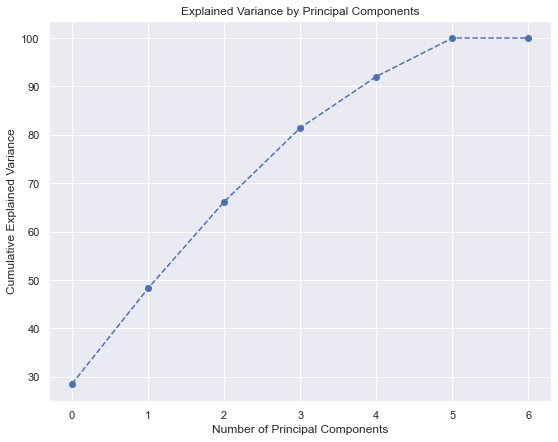

In [361]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,7),(pca_case_one.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 3 components.

##### Correlation circles visualization

By executing the function display_circles() we obtain the correlation circles.

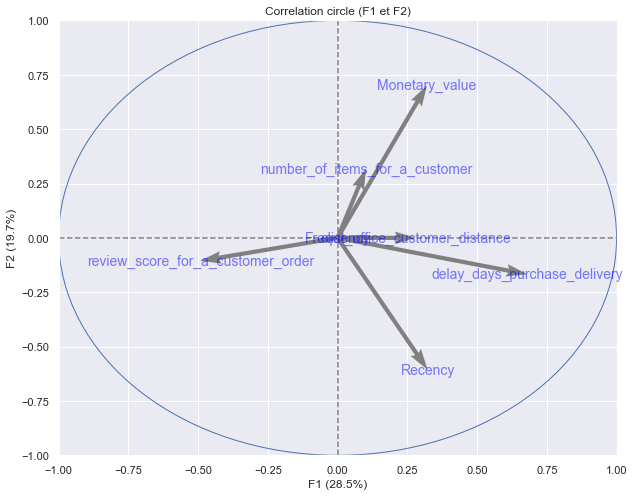

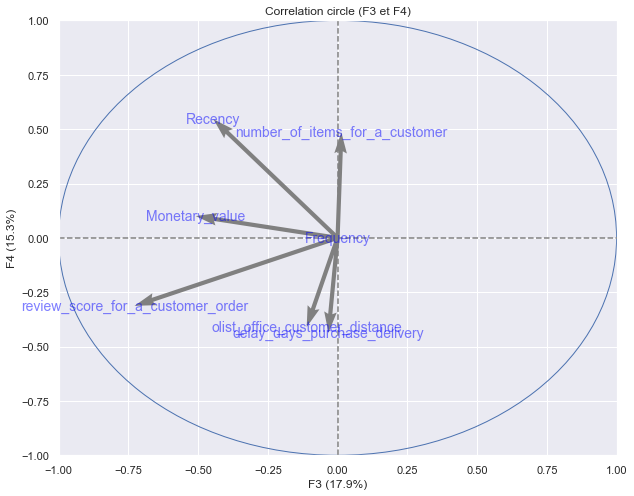

In [362]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca_case_one.components_
display_circles(components_pca, 7, pca_case_one, [(0,1),(2,3)], labels = np.array(features))

##### Projected data visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


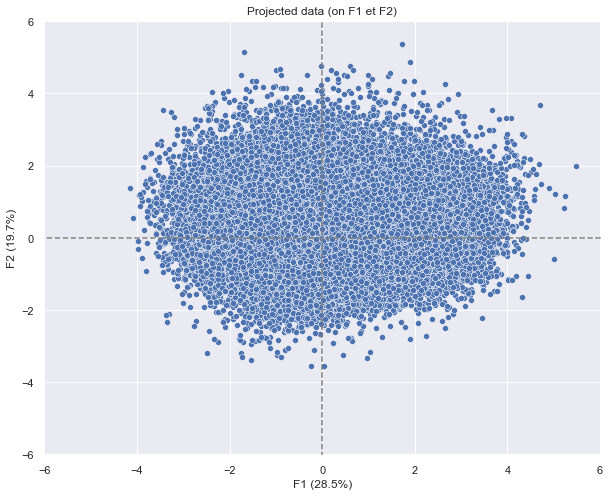

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


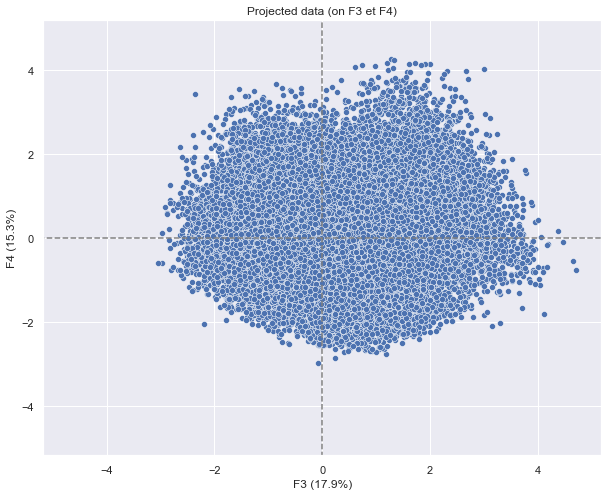

In [363]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result_case_one
display_factorial_planes(X_projected, 7, pca_case_one, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [364]:
df_for_PCA_case_one['F1'] = pca_result_case_one[:,0]
df_for_PCA_case_one['F2'] = pca_result_case_one[:,1]
df_for_PCA_case_one['F3'] = pca_result_case_one[:,2]
df_for_PCA_case_one['F4'] = pca_result_case_one[:,3]

In [365]:
df_for_PCA_case_one.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234  Can't Loose Them   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3        F4  
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266  0.036654  
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792  0.449223  
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151  0.428612  
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989 -1.045489  
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382  0.214313

Text(0.5, 1.0, 'PCA analysis')

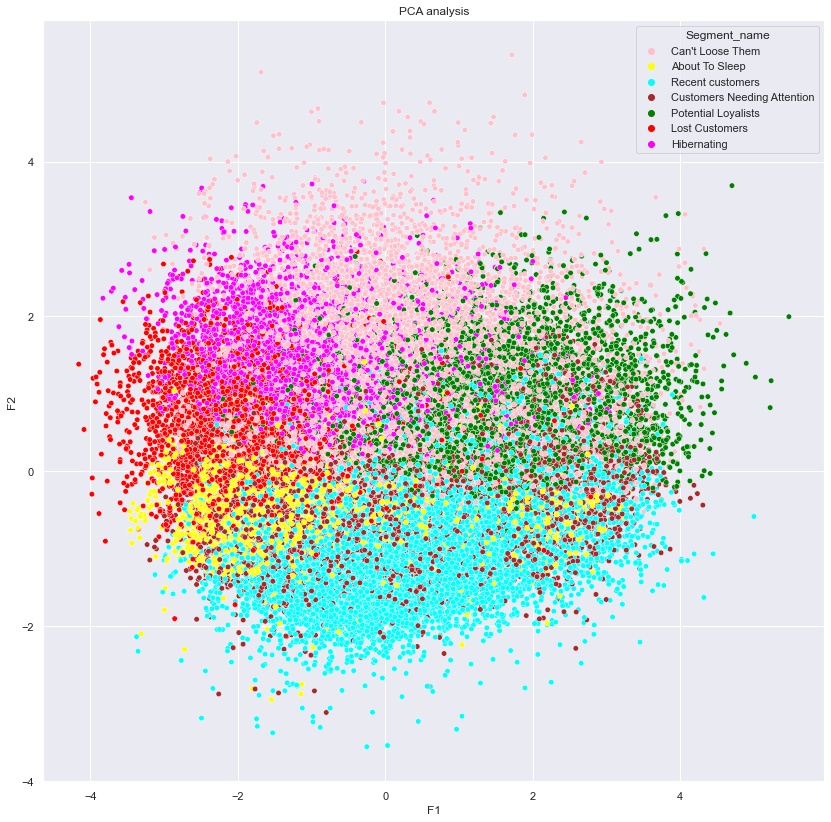

In [366]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

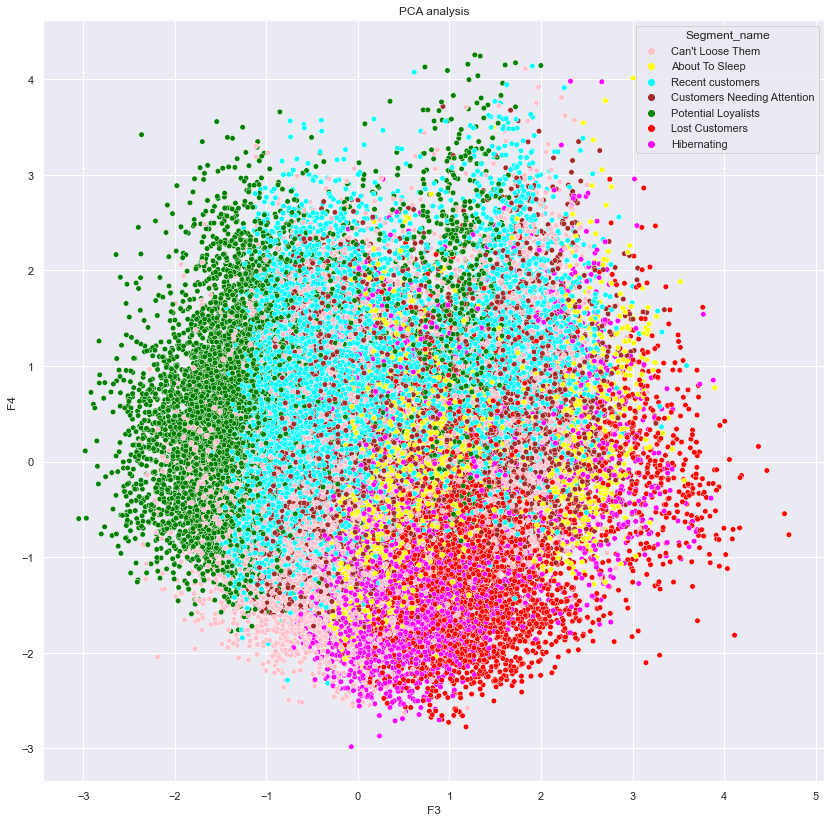

In [367]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F3", y="F4", hue="Segment_name", data=df_for_PCA_case_one, palette=my_pal, s=30)
plt.title('PCA analysis')

### K-means clusterization

We will start by importing the necessary modules for K-means clusterization. 

In [368]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We will produce a new dataframe which we will use for K-means analysis.

In [369]:
df_k_means_reduced_PCA = df_for_PCA_case_one.copy()

In [370]:
df_k_means_reduced_PCA.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

We need to find the best parameters for the K-means clusterer, and the way to go is using either the silhouette method or the elbow method. We will test the elbow method.

#### Elbow method: determining the best K number of clusters

The elbow method runs K-means clustering on the dataset for a range of values of K. It performs K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then the idea is to plot these points corresponding to the number of the K cluster. Then we need to find the point where the average distance from the centroid falls suddenly (Elbow-shaped).

See reference: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=Silhouette%20analysis,for%20each%20value%20of%20K

In [373]:
Sum_of_squared_distances_kmeans_clusterer_elbow = []
K = range(1,20) # Range of clusters to find the best fit

for k in K:
    k_means_clusterer_elbow = KMeans(n_clusters=k, random_state=42)
    k_means_clusterer_elbow = k_means_clusterer_elbow.fit(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
    Sum_of_squared_distances_kmeans_clusterer_elbow.append(k_means_clusterer_elbow.inertia_)

For the visualization of the elbow method of our K-Means clusterer, we have:

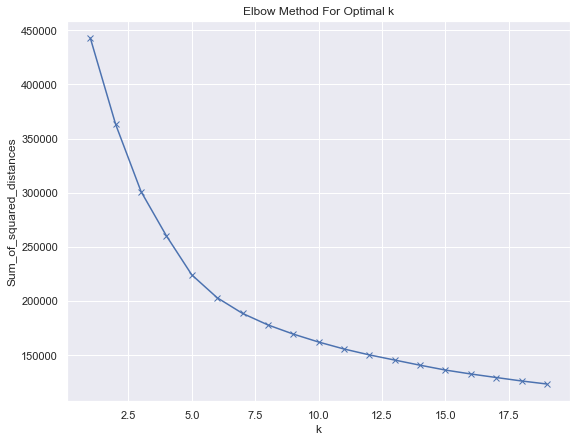

In [374]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_kmeans_clusterer_elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. Hence there is a point when the decrease os thr sum of squared distances is not significant for increasing k-cluster value. That’s how we get the optimal value of k.

As observed, the optimal number of clusters to run the K-means algorithm from elbow method is 5 clusters.

In [375]:
clusterer_k_means_with_elbow_result = KMeans(n_clusters=5, random_state=42)

#Predict the labels of clusters
cluster_labels_with_elbow_result = clusterer_k_means_with_elbow_result.\
                                    fit_predict(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 
                                                                                        'Segment_name', 
                                                                                        'RFM_Score', 
                                                                                        'F1', 
                                                                                        'F2', 
                                                                                        'F3', 
                                                                                        'F4']).values)

In [376]:
df_k_means_reduced_PCA['Segment_k_means_label'] = cluster_labels_with_elbow_result

In [377]:
df_k_means_reduced_PCA.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234  Can't Loose Them   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3  \
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266   
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792   
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151   
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989   
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382   

         F4  Segment_k_means_label  
0  0.036654                      1  
1  0.449223                      3  
2  0.428612                      0  
3 -1.045489                      0  
4  0.214313                      0

We can get also the centroids of each cluster.

In [378]:
# Getting the Centroids of the clusters
centroids = clusterer_k_means_with_elbow_result.cluster_centers_
unique_labels = np.unique(cluster_labels_with_elbow_result)

We then visualize the clusterization from K-means, using the first four principal components obtained from the PCA analysis. 

Text(0.5, 1.0, 'Clusters by Principal Components')

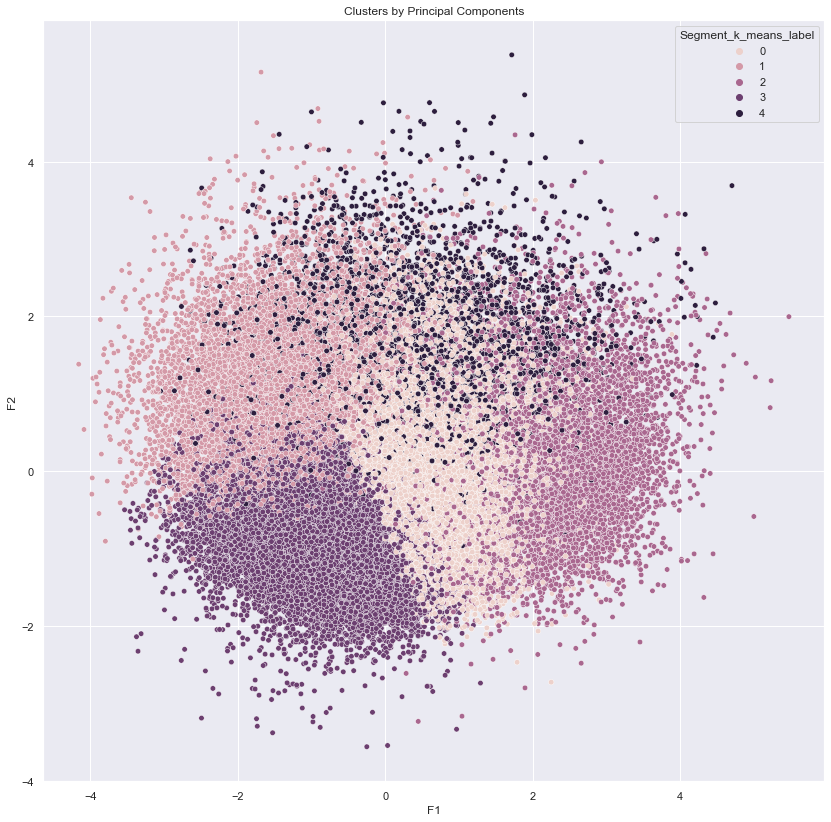

In [379]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

Text(0.5, 1.0, 'Clusters by Principal Components')

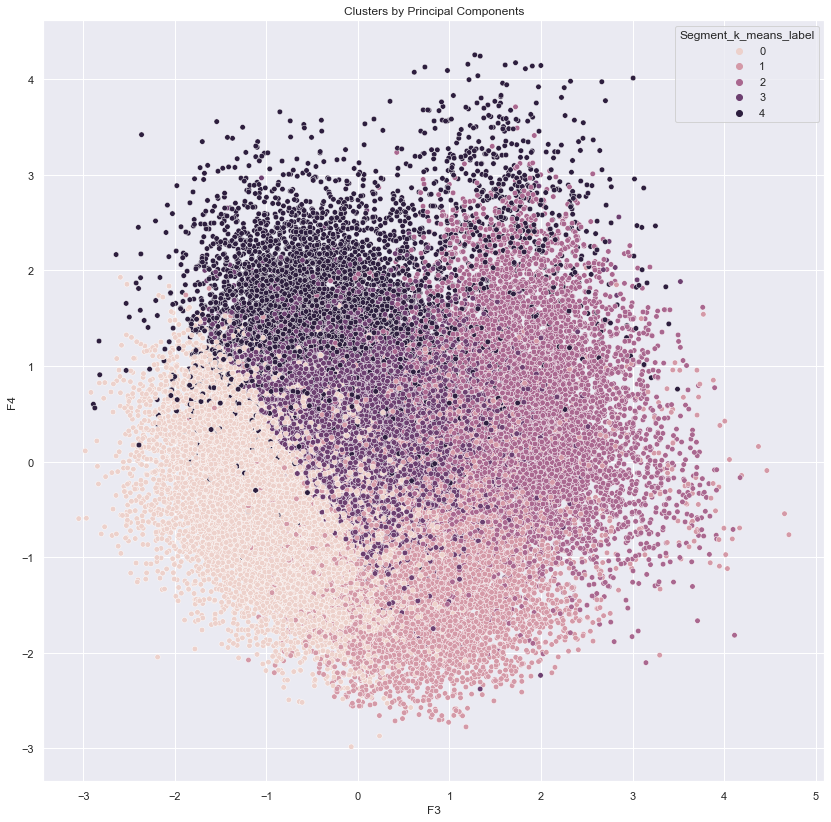

In [380]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F3'], y = df_k_means_reduced_PCA['F4'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

We observed that K-means clusterer asigned five labels to the data points (each label corresponding to a cluster). Next, the idea is to give some significance to the groups formed by K-means.

#### Interpretation of automatic segmentation

We will create a dataframe that will contain the statistics for each group of labels created from K-means. For this we will perform a merge between the dataframe that we have used for the K-means clusterization and the previously obtained dataframe from RFM segmentation. We can perform this merge by customer_unique_id. 

In fact, this will be helpful to asign after the customer segment names to each label.

In [381]:
df_k_means_reduced_PCA.columns

Index(['customer_unique_id', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4',
       'Segment_k_means_label'],
      dtype='object')

In [382]:
new_df_k_means_reduced_PCA = df_k_means_reduced_PCA.copy()

new_df_k_means_reduced_PCA = new_df_k_means_reduced_PCA.drop(columns=['review_score_for_a_customer_order',
                                                                      'number_of_items_for_a_customer', 
                                                                      'delay_days_purchase_delivery',
                                                                      'olist_office_customer_distance', 
                                                                      'Segment_name', 
                                                                      'RFM_Score', 
                                                                      'Frequency',
                                                                      'Monetary_value', 
                                                                      'Recency', 
                                                                      'F1', 
                                                                      'F2', 
                                                                      'F3', 
                                                                      'F4'])

df_merge_segmentation_interpretation = new_df_k_means_reduced_PCA.copy()

df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.merge(automatic_segmentation_new_df, on='customer_unique_id', how='left') 

In [383]:
df_merge_segmentation_interpretation.columns

Index(['customer_unique_id', 'Segment_k_means_label',
       'review_score_for_a_customer_order', 'number_of_items_for_a_customer',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Segment_name', 'Frequency', 'Monetary_value', 'Recency', 'RFM_Score'],
      dtype='object')

In [384]:
df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.drop(columns=['customer_unique_id',
                                                                                           'Segment_name',
                                                                                           'RFM_Score'])
       
df_merge_segmentation_interpretation.head()

df_stats_segmentation = df_merge_segmentation_interpretation.copy()

In [385]:
df_stats_segmentation.columns

Index(['Segment_k_means_label', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Frequency', 'Monetary_value',
       'Recency'],
      dtype='object')

In [386]:
df_stats_segmentation = df_stats_segmentation.groupby('Segment_k_means_label')[['Frequency', 
                                                                                'Monetary_value', 
                                                                                'Recency', 
                                                                                'review_score_for_a_customer_order', 
                                                                                'number_of_items_for_a_customer',
                                                                                'delay_days_purchase_delivery', 
                                                                                'olist_office_customer_distance']].agg([np.mean])

new_df_stats_segmentation = df_stats_segmentation.copy()

new_df_stats_segmentation["size"] = df_merge_segmentation_interpretation.groupby('Segment_k_means_label')[['Recency']].agg([np.size]) 

new_df_stats_segmentation.round(1).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           1.0          223.4   275.4   
1                           1.0          141.2    45.6   
2                           1.0          167.3   242.6   
3                           1.0           71.4   290.4   
4                           1.0          223.6   243.1   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   4.5   
1                                                   4.6   
2                                                   1.2   
3                                                   4.6   
4                                                   4.1   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.1   
3                                                1.0   
4                                                2.2   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                             16.3   
1                                              7.1   
2                                             22.6   
3                                              8.5   
4                                             10.9   

                      olist_office_customer_distance   size  
                                                mean         
Segment_k_means_label                                        
0                                             1031.7  27911  
1                                              616.9  13761  
2                                              848.5   9038  
3                                              474.8  28620  
4                                              674.3   6433

In order to asign customer segment names to the labels obtained from K-means, we will connect first the detailed segmentation obtained from RFM with the main five groups obtained before from the heuristic RFM method. This is:

* **Top customer:** Potential Loyalists (0)
* **High value customer:** Customers Needing Attention (4)
* **Medium value customer:** Recent customers (3)
* **Low-value customer:** About To Sleep, Can't Loose Them (2)
* **Lost customer:** Lost Customers, Hibernating (1)

We have the behavior for each client subsegment:

* **Potential Loyalists:** Recent customers with average frequency.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Recent Customers:** Bought most recently, but not often.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **About To Sleep:** Below average recency and frequency. Will lose them if not reactivated.
* **Hibernating:** Last purchase was long back and low number of orders.
* **Lost Customers:** Purchased long time ago and never came back.

We will then asign each label obtained from K-means to the five main groups obtained from the RFM heuristic method.

In [387]:
df_k_means_reduced_PCA['Segment_client_k_means'] = \
    df_k_means_reduced_PCA['Segment_k_means_label'].map({
        0: 'Top customer: Potential Loyalists', # High recency and high monetary value. Recent customers.
        4: 'High value customer: Customers Needing Attention', # High recency and high monetary value. May not have placed purchase very recently.
        3: 'Medium value customer: Recent customers', # Highest recency
        2: 'Low-value customer: About To Sleep, Can\'t Loose Them', # Not so high recency. Haven't returned for a while.
        1: 'Lost customer: Lost Customers, Hibernating' # Low Recency and low monetary value
        })

We plot the data points with the corresponding customer segment names.

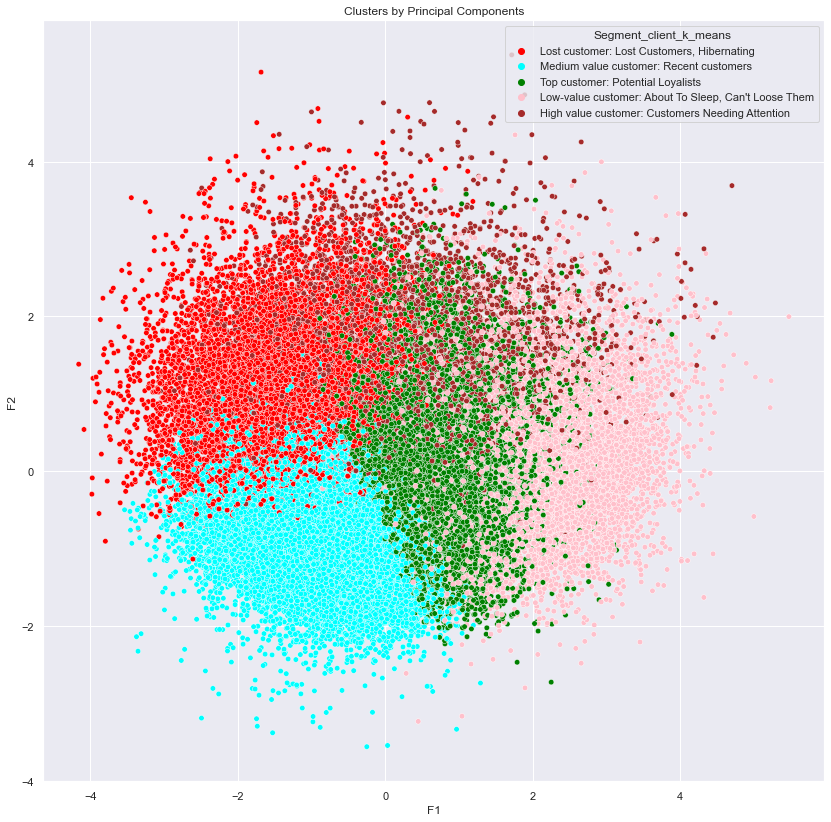

In [388]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost customer: Lost Customers, Hibernating":"red",
           "Low-value customer: About To Sleep, Can\'t Loose Them":"pink",
           "High value customer: Customers Needing Attention":"brown",
           "Medium value customer: Recent customers":"cyan",
           "Top customer: Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

We will now add three more columns corresponding to the customer segments (and subsegments for a better understanding o their behavior) and a description. We keep the following order.

* **Top customer:** Potential Loyalists (0) **-->** 'Recent customers with high monetary value.'
* **High value customer:** Customers Needing Attention (4) **-->** 'Above average recency and monetary values. May not have bought very recently though.'
* **Medium value customer:** Recent customers (3) **-->** 'Bought most recently, but not often.'
* **Low-value customer:** About To Sleep, Can't Loose Them (2) **-->** 'Below average recency (will lose them if not reactivated). Also used to purchase frequently but haven\'t returned for a long time.'
* **Lost customer:** Lost Customers, Hibernating (1) **-->** 'Purchased long time ago and never came back. Also last purchase was long back and low number of orders.'

In [389]:
new_df_stats_segmentation['Client_segment'] = ['Top customer', # (0) High recency and high monetary value. Recent customers.
                                                'Lost customer', # (1) Low Recency and low monetary value
                                                'Low-value customer', # (2) Not so high recency. Haven't returned for a while.
                                                'Medium value customer', # (3) Highest recency.
                                                'High value customer' # (4) High recency and high monetary value. May not have placed purchase very recently.
                                                ]
                                                
new_df_stats_segmentation['Client_subsegment'] = ['Potential Loyalists', # (0) High recency and high monetary value. Recent customers.
                                                    'Lost Customers, Hibernating', # (1) Low Recency and low monetary value.
                                                    'About To Sleep, Can\'t Loose Them', # (2) Not so high recency. Haven't returned for a while.
                                                    'Recent customers', # (3) Highest recency.
                                                    'Customers Needing Attention' # (4) High recency and high monetary value. May not have placed purchase very recently.    
                                                    ]
                                                
new_df_stats_segmentation['Description'] = ['Recent customers with high monetary value.', # (0) 'Top customer'
                                            'Purchased long time ago and never came back. Also last purchase was long back and low number of orders.', # (1) 'Lost customer'
                                            'Below average recency (will lose them if not reactivated). Also used to purchase frequently but haven\'t returned for a long time.', # (2) 'Low-value customer'
                                            'Bought most recently, but not often.', # (3) 'Medium value customer'
                                            'Above average recency and monetary values. May not have bought very recently though.' # (4) 'High value customer'
                                            ]

In [390]:
new_df_stats_segmentation.round(0).drop(columns=['review_score_for_a_customer_order',
                                                    'number_of_items_for_a_customer',
                                                    'delay_days_purchase_delivery',
                                                    'olist_office_customer_distance']).head()

Frequency Monetary_value Recency   size  \
                           mean           mean    mean          
Segment_k_means_label                                           
0                           1.0          223.0   275.0  27911   
1                           1.0          141.0    46.0  13761   
2                           1.0          167.0   243.0   9038   
3                           1.0           71.0   290.0  28620   
4                           1.0          224.0   243.0   6433   

                              Client_segment  \
                                               
Segment_k_means_label                          
0                               Top customer   
1                              Lost customer   
2                         Low-value customer   
3                      Medium value customer   
4                        High value customer   

                                      Client_subsegment  \
                                                          
Segment_k_means_label                                     
0                                   Potential Loyalists   
1                           Lost Customers, Hibernating   
2                      About To Sleep, Can't Loose Them   
3                                      Recent customers   
4                           Customers Needing Attention   

                                                             Description  
                                                                          
Segment_k_means_label                                                     
0                             Recent customers with high monetary value.  
1                      Purchased long time ago and never came back. A...  
2                      Below average recency (will lose them if not r...  
3                                   Bought most recently, but not often.  
4                      Above average recency and monetary values. May...

In [391]:
new_df_stats_segmentation.round(0).drop(columns=['Client_subsegment',
                                                    'Description']).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           1.0          223.0   275.0   
1                           1.0          141.0    46.0   
2                           1.0          167.0   243.0   
3                           1.0           71.0   290.0   
4                           1.0          224.0   243.0   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   5.0   
1                                                   5.0   
2                                                   1.0   
3                                                   5.0   
4                                                   4.0   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   
4                                                2.0   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                             16.0   
1                                              7.0   
2                                             23.0   
3                                              9.0   
4                                             11.0   

                      olist_office_customer_distance   size  \
                                                mean          
Segment_k_means_label                                         
0                                             1032.0  27911   
1                                              617.0  13761   
2                                              848.0   9038   
3                                              475.0  28620   
4                                              674.0   6433   

                              Client_segment  
                                              
Segment_k_means_label                         
0                               Top customer  
1                              Lost customer  
2                         Low-value customer  
3                      Medium value customer  
4                        High value customer

In [392]:
new_df_stats_segmentation.describe()

Frequency Monetary_value     Recency review_score_for_a_customer_order  \
           mean           mean        mean                              mean   
count       5.0       5.000000    5.000000                          5.000000   
mean        1.0     165.387137  219.422311                          3.779155   
std         0.0      63.588866   99.336372                          1.480190   
min         1.0      71.403774   45.636509                          1.160655   
25%         1.0     141.226364  242.575349                          4.055884   
50%         1.0     167.308807  243.089538                          4.517233   
75%         1.0     223.363441  275.387446                          4.575489   
max         1.0     223.633297  290.422711                          4.586513   

      number_of_items_for_a_customer delay_days_purchase_delivery  \
                                mean                         mean   
count                       5.000000                     5.000000   
mean                        1.259642                    13.066358   
std                         0.512199                     6.362529   
min                         1.000000                     7.056173   
25%                         1.000175                     8.547834   
50%                         1.010973                    10.881704   
75%                         1.115291                    16.276593   
max                         2.171771                    22.569484   

      olist_office_customer_distance          size  
                                mean                
count                       5.000000      5.000000  
mean                      729.251369  17152.600000  
std                       215.690177  10482.174646  
min                       474.824577   6433.000000  
25%                       616.883092   9038.000000  
50%                       674.337278  13761.000000  
75%                       848.469375  27911.000000  
max                      1031.742521  28620.000000

### DBSCAN clusterization

We will now test the DBSCAN algorithm. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning technique used to identify clusters of varying shape in a dataset.

The advantages of DBSCAN over other clustering algorithms are:

* DBSCAN does not require a pre-determined set number of clusters.
* DBSCAN identifies outliers as noise, instead of classifying them into a cluster.
* DBSCAN is more flexible when it comes to the size and shape of clusters than other partitioning methods, such as K-means. It is able to identify clusters that differ in size and shape from one another, which makes it more useful for messy data.

See reference:

https://medium.com/@tarammullin/dbscan-2788cfce9389

In [148]:
from sklearn.cluster import DBSCAN

We will create a dataframe that we can manipulate after for DBSCAN analysis.

In [149]:
df_dbscan_reduced_PCA = df_for_PCA_case_one.copy()

#### DBSCAN Parameter Estimation:

https://medium.com/@tarammullin/dbscan-2788cfce9389

DBSCAN’s two parameters are: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

* Minimum samples ('min_samples'): the fewest number of points required to form a cluster. min_samples value should be set using domain knowledge and familiarity with the dataset. The larger the dataset, the larger the value of min_samples should be. If the data set is noisier, we need to choose a larger value of min_samples. Generally, min_samples should be greater than or equal to the dimensionality of the data set. For 2-dimensional data, we should use DBSCAN’s default value of min_samples = 4. If the data has more than 2 dimensions, we should choose min_samples = 2*dim, where dim = the_dimensions_of_dataset. In our case, we have 7 features, which means min_samples = 14.

* ε (epsilon or 'eps'): the maximum distance two points can be from one another while still belonging to the same cluster. To determine eps parameter we can use NearestNeighbors from Scikit-learn, to calculate the average distance between each point and its n_neighbors. This technique calculates the average distance between each point and its k nearest neighbors. The average k-distances are then plotted in ascending order on a k-distance graph. We will find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

See also reference: https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan#:~:text=Sort%20the%20distances%20in%20the,'elbow'%20as%20optimal%20eps.

In [150]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)

neighbors_fit = neighbors.fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

distances, indices = neighbors_fit.kneighbors(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

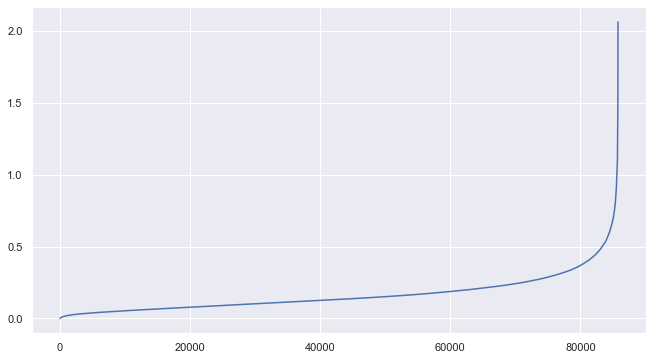

In [151]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [750]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# We can try with 0.8, 1, 1.5, where some clusters where observed. min_samples => 14. min_samples = 20 worked fine

dbscan_clusterer = DBSCAN(eps = 1.5, min_samples = 30).fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
labels_db_scan = dbscan_clusterer.labels_

We will now visualize the clusterization from DBSCAN algorithm using the four two principal components obtained from PCA analysis.

In [751]:
df_dbscan_reduced_PCA['Segment_dbscan_label'] = labels_db_scan

In [752]:
df_dbscan_reduced_PCA.head()

customer_unique_id  review_score_for_a_customer_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2                           0.564300   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                           0.092518   
2  0000f46a3911fa3c0805444483337064                          -0.511839   
3  0000f6ccb0745a6a4b88665a16c9f078                           0.092518   
4  0004aac84e0df4da2b147fca70cf8255                           0.564300   

   number_of_items_for_a_customer  delay_days_purchase_delivery  \
0                       -0.314543                     -0.731098   
1                       -0.314543                     -1.724060   
2                       -0.314543                      1.401335   
3                       -0.314543                      1.018144   
4                       -0.314543                      0.390129   

   olist_office_customer_distance      Segment_name  Frequency  \
0                       -0.470234    About To Sleep   -0.17879   
1                       -0.514157    About To Sleep   -0.17879   
2                       -0.838033  Recent customers   -0.17879   
3                        1.790624  Recent customers   -0.17879   
4                       -0.677719  Recent customers   -0.17879   

   Monetary_value   Recency  RFM_Score        F1        F2        F3  \
0        0.346429 -0.461627        2.0 -0.993074  0.520446 -0.301266   
1       -1.666547 -0.433839        2.0 -2.083982 -0.691972  1.090792   
2       -0.262229  1.181793        3.0  1.218144 -1.145870  0.031151   
3       -1.075013  0.645270        3.0  0.963221 -1.390278 -0.034989   
4        0.743898  0.532168        3.0  0.158793  0.008981 -0.959382   

         F4  Segment_dbscan_label  
0  0.036654                     0  
1  0.449223                     0  
2  0.428612                     0  
3 -1.045489                     0  
4  0.214313                     0

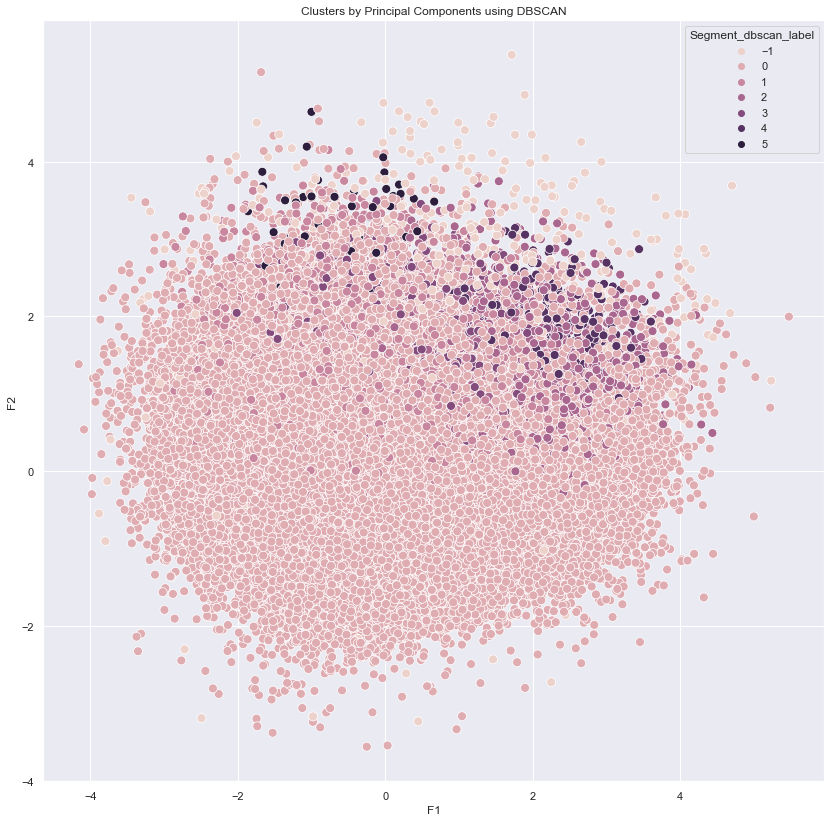

In [755]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA['F1'], y = df_dbscan_reduced_PCA['F2'], hue = df_dbscan_reduced_PCA['Segment_dbscan_label'], s = 80)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

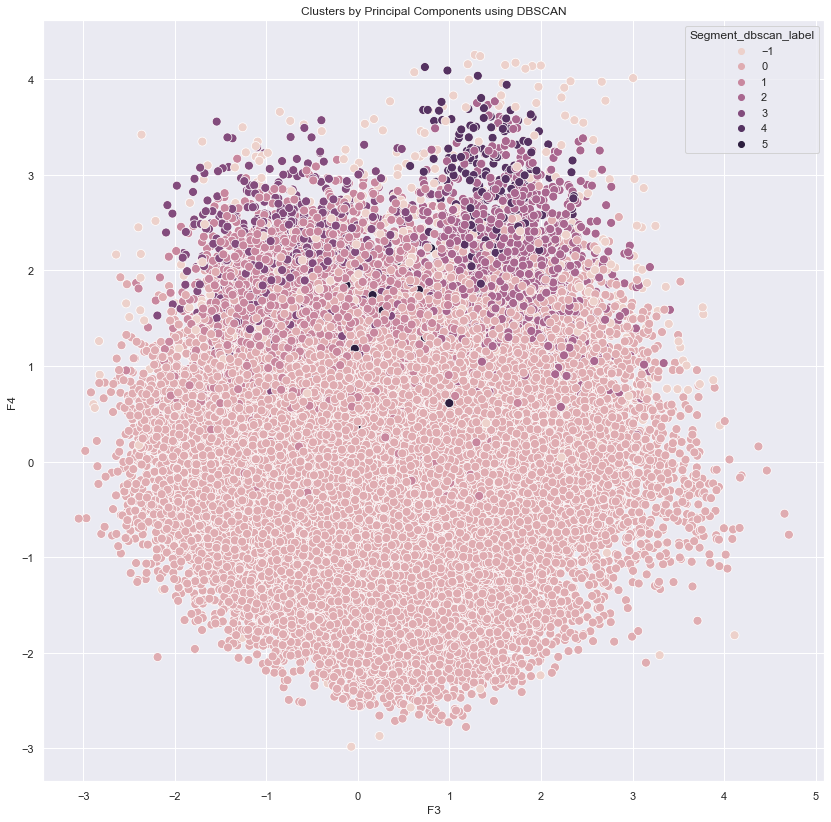

In [756]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA['F3'], y = df_dbscan_reduced_PCA['F4'], hue = df_dbscan_reduced_PCA['Segment_dbscan_label'], s = 80)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

In [749]:
df_dbscan_reduced_PCA['Segment_dbscan_label'].unique()

array([ 0,  1, -1,  2,  4,  3], dtype=int64)

### TSNE clusterization

In [713]:
#TSNE 

from sklearn.manifold import TSNE


In [732]:
df_for_TSNE = df_for_PCA_case_one.copy()

In [733]:
df_for_TSNE.shape

(85763, 14)

In [759]:
quantity = 5000
per = pow(quantity, 0.5)

# per = 50.0

tsne = TSNE(verbose=1, random_state=42, perplexity=per)
tsne_result = tsne.fit_transform(df_for_TSNE[:quantity].drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values) 

new_df_for_TSNE = pd.DataFrame()
new_df_for_TSNE["y"] = df_for_TSNE[:quantity]['Segment_name']
new_df_for_TSNE["comp-1"] = tsne_result[:,0]
new_df_for_TSNE["comp-2"] = tsne_result[:,1]



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 213 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.009s...
[t-SNE] Computed neighbors for 5000 samples in 0.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.461159
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.155457
[t-SNE] KL divergence after 1000 iterations: 1.286920


In [757]:
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}

[Text(0.5, 1.0, 'Data T-SNE projection')]

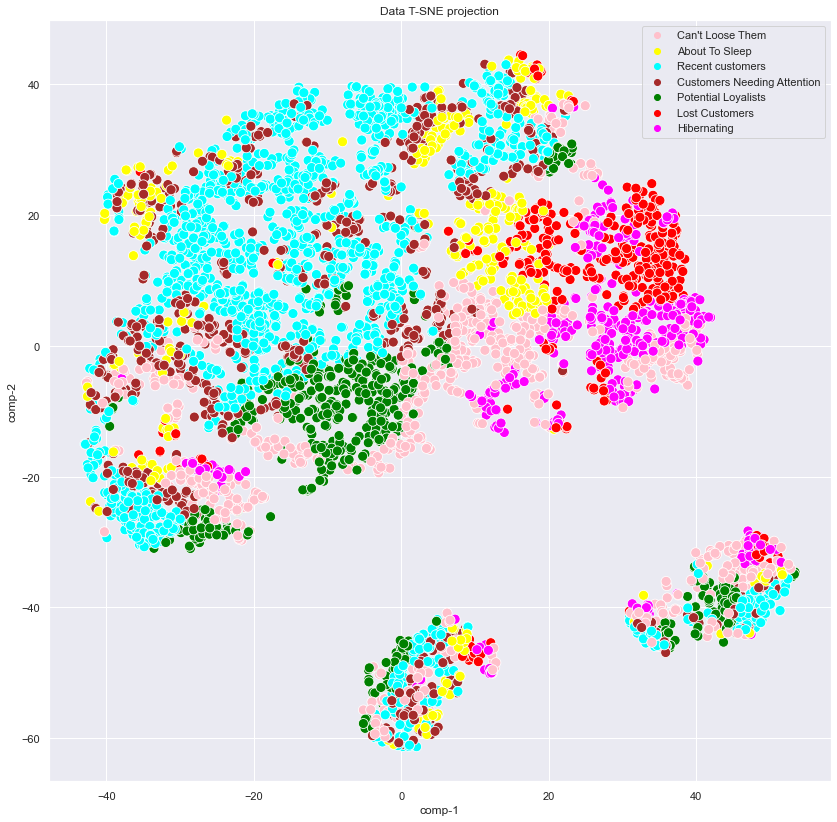

In [760]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x="comp-1", y="comp-2", hue=new_df_for_TSNE.y.tolist(), s = 100,
                palette=my_pal,
                # palette=sns.color_palette("hls", 3),
                data=new_df_for_TSNE).set(title="Data T-SNE projection")

In [742]:
quantity = 20000
per = pow(quantity, 0.5)

# per = 140.0

tsne = TSNE(verbose=1, random_state=42, perplexity=per)
tsne_result = tsne.fit_transform(df_for_TSNE[:quantity].drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values) 

new_df_for_TSNE = pd.DataFrame()
new_df_for_TSNE["y"] = df_for_TSNE[:quantity]['Segment_name']
new_df_for_TSNE["comp-1"] = tsne_result[:,0]
new_df_for_TSNE["comp-2"] = tsne_result[:,1]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 425 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.037s...
[t-SNE] Computed neighbors for 20000 samples in 7.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Data T-SNE projection')]

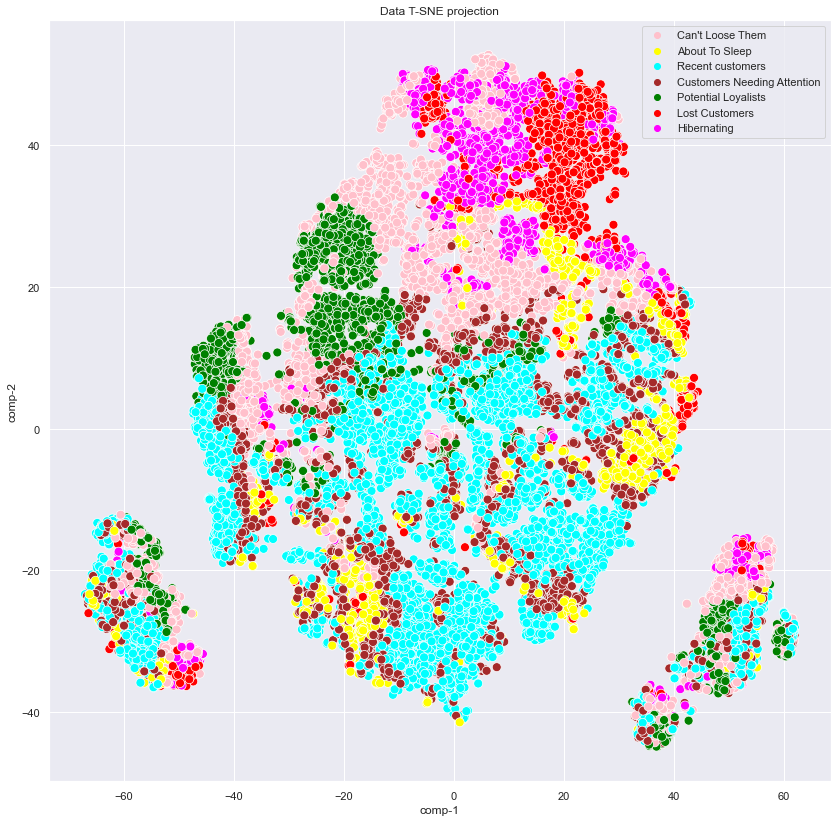

In [758]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x="comp-1", y="comp-2", hue=new_df_for_TSNE.y.tolist(), s = 80,
                palette=my_pal,
                # palette=sns.color_palette("hls", 3),
                data=new_df_for_TSNE).set(title="Data T-SNE projection")

## Segmentation maintenance analysis

Now that we have associated the labels created by K-means to the clients segments, we will try to determine the dynamics of the clients segmentation in time. For this we will merge the dataframe used in K-means analysis that contains the labels asigned to each cluster, with the dataframe created for the analysis of order placement afluence.

In [553]:
df_merge_segmentation_stability_analysis = new_df_k_means_reduced_PCA.copy()

df_merge_segmentation_stability_analysis = df_merge_segmentation_stability_analysis.merge(df_subset_for_purchase_dates, on='customer_unique_id', how='left') 

In [554]:
df_merge_segmentation_stability_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85763 entries, 0 to 85762
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        85763 non-null  object        
 1   Segment_k_means_label     85763 non-null  int32         
 2   order_id                  85763 non-null  object        
 3   order_purchase_timestamp  85763 non-null  datetime64[ns]
 4   purchase_month            85763 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 3.6+ MB


In [555]:
df_merge_segmentation_stability_analysis['Segment_client_k_means'] = \
    df_merge_segmentation_stability_analysis['Segment_k_means_label'].map({
        0: 'Top customer: Potential Loyalists', # High recency and high monetary value. Recent customers.
        4: 'High value customer: Customers Needing Attention', # High recency and high monetary value. May not have placed purchase very recently.
        3: 'Medium value customer: Recent customers', # Highest recency
        2: 'Low-value customer: About To Sleep, Can\'t Loose Them', # Not so high recency. Haven't returned for a while.
        1: 'Lost customer: Lost Customers, Hibernating' # Low Recency and low monetary value
        })

In [556]:
df_merge_segmentation_stability_analysis.head(10)

customer_unique_id  Segment_k_means_label  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      3   
2  0000f46a3911fa3c0805444483337064                      0   
3  0000f6ccb0745a6a4b88665a16c9f078                      0   
4  0004aac84e0df4da2b147fca70cf8255                      0   
5  0004bd2a26a76fe21f786e4fbd80607f                      1   
6  00050ab1314c0e55a6ca13cf7181fecf                      3   
7  0005e1862207bf6ccc02e4228effd9a0                      3   
8  0005ef4cd20d2893f0d9fbd94d3c0d97                      2   
9  0006fdc98a402fceb4eb0ee528f6a8d4                      3   

                           order_id order_purchase_timestamp purchase_month  \
0  e22acc9c116caa3f2b7121bbb380d08e               2018-05-10            May   
1  3594e05a005ac4d06a72673270ef9ec9               2018-05-07            May   
2  b33ec3b699337181488304f362a6b734               2017-03-10          March   
3  41272756ecddd9a9ed0180413cc22fb6               2017-10-12        October   
4  d957021f1127559cd947b62533f484f7               2017-11-14       November   
5  3e470077b690ea3e3d501cffb5e0c499               2018-04-05          April   
6  d0028facea13f508e880202d7097a5a1               2018-04-20          April   
7  ae76bef74b97bcb0b3e355e60d9a6f9c               2017-03-04          March   
8  01b330808c5819a6a3cb79b72f0b8288               2018-03-12          March   
9  6681163e3dab91c549952b2845b20281               2017-07-18           July   

                              Segment_client_k_means  
0         Lost customer: Lost Customers, Hibernating  
1            Medium value customer: Recent customers  
2                  Top customer: Potential Loyalists  
3                  Top customer: Potential Loyalists  
4                  Top customer: Potential Loyalists  
5         Lost customer: Lost Customers, Hibernating  
6            Medium value customer: Recent customers  
7            Medium value customer: Recent customers  
8  Low-value customer: About To Sleep, Can't Loos...  
9            Medium value customer: Recent customers

Now we will define a period of time equal to one year. We will use the data from September 2017 to September 2018. 

As we will use the data for the period from September 2017 to September 2018, we will see how many clients belong to each customer segment in each year season, this is:

* September, 2017 - November, 2017 --> Fall season
* December, 2017 - February, 2018 --> Winter season
* March, 2018 - May, 2018 --> Spring season
* June, 2018 - August, 2018 --> Summer season

In [557]:
def create_season_dataframe(df_season, season_start_date, season_end_date):

    mask = (df_season['order_purchase_timestamp'] >= season_start_date) & (df_season['order_purchase_timestamp'] <= season_end_date)

    df_season = df_season.loc[mask]

    df_season['order_purchase_timestamp'] = pd.to_datetime(df_season['order_purchase_timestamp']).dt.date

    df_season_stats = pd.DataFrame(df_season.groupby('Segment_client_k_means', as_index= False).agg({'customer_unique_id': np.size}))

    return df_season_stats

### Fall season dataframe

Next, we will see the stats for the customers segments along the season of the year period.

In [558]:
df_fall_season = df_merge_segmentation_stability_analysis.copy()
df_fall_season_stats = create_season_dataframe(df_fall_season, '2017-09-01', '2017-11-01')
df_fall_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                 600
1  Low-value customer: About To Sleep, Can't Loos...                 672
2            Medium value customer: Recent customers                3446
3                  Top customer: Potential Loyalists                2977

### Winter season dataframe

In [559]:
df_winter_season = df_merge_segmentation_stability_analysis.copy()
df_winter_season_stats = create_season_dataframe(df_winter_season, '2017-12-01', '2018-02-01')
df_winter_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                 784
1         Lost customer: Lost Customers, Hibernating                   4
2  Low-value customer: About To Sleep, Can't Loos...                1313
3            Medium value customer: Recent customers                4558
4                  Top customer: Potential Loyalists                4664

### Spring season dataframe

In [560]:
df_spring_season = df_merge_segmentation_stability_analysis.copy()
df_spring_season_stats = create_season_dataframe(df_spring_season, '2018-03-01', '2018-05-01')
df_spring_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                 929
1         Lost customer: Lost Customers, Hibernating                 265
2  Low-value customer: About To Sleep, Can't Loos...                1819
3            Medium value customer: Recent customers                4888
4                  Top customer: Potential Loyalists                4700

### Summer season dataframe

In [561]:
df_summer_season = df_merge_segmentation_stability_analysis.copy()
df_summer_season_stats = create_season_dataframe(df_spring_season, '2018-06-01', '2018-08-01')
df_summer_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                 894
1         Lost customer: Lost Customers, Hibernating                7737
2  Low-value customer: About To Sleep, Can't Loos...                 795
3            Medium value customer: Recent customers                 566
4                  Top customer: Potential Loyalists                1459

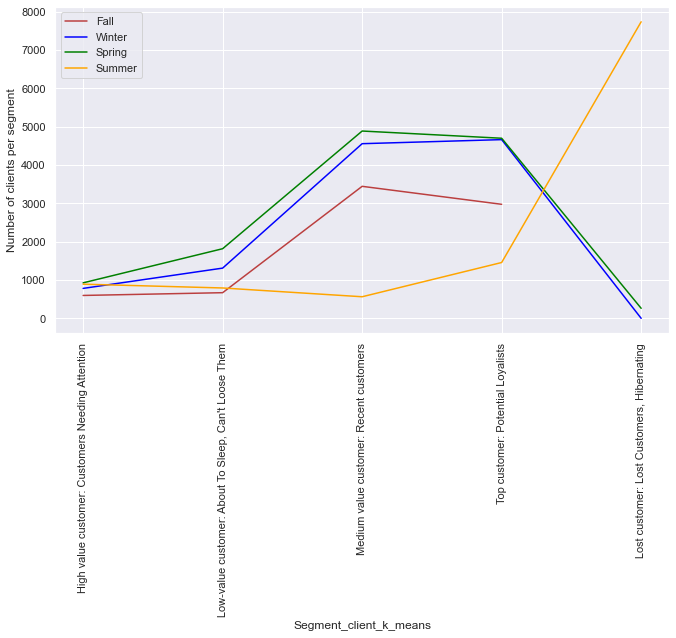

In [647]:
order_ticks = ["Top customer: Potential Loyalists",
                "High value customer: Customers Needing Attention",
                "Medium value customer: Recent customers",
                "Low-value customer: About To Sleep, Can\'t Loose Them"
                "Lost customer: Lost Customers, Hibernating"]

sns.lineplot(data=df_fall_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='o', color="#bb3f3f", label='Fall')
sns.lineplot(data=df_winter_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='x', color="blue", label='Winter')
sns.lineplot(data=df_spring_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='+', color="green", label='Spring')
sns.lineplot(data=df_summer_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='*', color="orange", label='Summer')

plt.xticks(rotation=90)
plt.ylabel('Number of clients per segment')
plt.legend()

As observed, there is a change in the number of clients belonging to each segment for each season of the year. An interesting observation is that in the Fall of 2017 (end of year), there are no Lost customers observed and there are a lot of Medium value and Top customers registered. Then in the Winter of 2018, Lost customers start to appear, increasing their number by Spring of 2018 and Summer of 2018.